# COVID 19 in California Exploratory Data Analysis

As the Coronavirus continues to spread it has become ever more apparent that we are dealing with the biggest public health challenge of our generation. Fortunately, California’s state and county officials have been working tirelessly for months to help protect and ensure the safety of all citizens. Thus, the purpose of this project is to utilize my data wrangling, visualization, and analytical skills to obtain some insight on the spread of the coronavirus in California and learn about the challenges that our government experts are facing while making these tough decisions. In this report, I will not only share my results but also go in-depth into the decisions taken to come to my conclusions. 
This analysis is divided into three parts: 
1.	Overview of the Spread of COVID-19 in California 
2.	Analysis of some Factors that could explain the differences in spread among counties
3.	Analysis of Testing Access, and ICU availability across California. 


## Overview of the Spread of COVID-19 in California

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt 
import geopandas as geo
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\Pavan\anaconda3\envs\myenv_conda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


The Coronavirus Data was obtained from the New York Times GitHub, and the California shapefile was obtained by the California Government. The first step is to preprocess and clean the data. 

In [2]:
# read in data
cali= geo.read_file(r"C:\Users\Pavan\OneDrive\Desktop\COVID19Data\CA_Counties_TIGER2016.shp")
cali.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,POLYGON ((-13431319.75097945 4821511.426395644...
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,POLYGON ((-13490651.47641084 4680831.603393857...
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,(POLYGON ((-13423116.77225655 4042044.14856006...
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483353 4627725.227535474, ..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,(POLYGON ((-13317853.59433417 3931602.41399276...


In [3]:
# read in data
cases=pd.read_csv(r"https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
cali_cases= cases[cases["state"]=="California"]
cali_cases.head()

,date,county,state,fips,cases,deaths
5,2020-01-25,Orange,California,6059.0,1,0
9,2020-01-26,Los Angeles,California,6037.0,1,0
10,2020-01-26,Orange,California,6059.0,1,0
14,2020-01-27,Los Angeles,California,6037.0,1,0
15,2020-01-27,Orange,California,6059.0,1,0


In [4]:
cali_cases=cali_cases.reset_index().drop("index", axis=1)

In [5]:
cali_cases=cali_cases.drop("fips",axis=1)
cali_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 5 columns):
date      5198 non-null object
county    5198 non-null object
state     5198 non-null object
cases     5198 non-null int64
deaths    5198 non-null int64
dtypes: int64(2), object(3)
memory usage: 142.2+ KB


In [6]:
# When I combined the data, I chose inner join since I wanted to keep the counties that were present in both datasets. 
covid=cali_cases.merge(cali, left_on="county",right_on="NAME", how="inner")
covid.head()

,date,county,state,cases,deaths,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,...,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,2020-01-25,Orange,California,1,0,06,059,00277294,06059,Orange,...,G4020,348,31080,11244,A,2047702298,407606601,+33.6756872,-117.7772068,POLYGON ((-13134488.10155519 3973319.471289119...
1,2020-01-26,Orange,California,1,0,06,059,00277294,06059,Orange,...,G4020,348,31080,11244,A,2047702298,407606601,+33.6756872,-117.7772068,POLYGON ((-13134488.10155519 3973319.471289119...
2,2020-01-27,Orange,California,1,0,06,059,00277294,06059,Orange,...,G4020,348,31080,11244,A,2047702298,407606601,+33.6756872,-117.7772068,POLYGON ((-13134488.10155519 3973319.471289119...
3,2020-01-28,Orange,California,1,0,06,059,00277294,06059,Orange,...,G4020,348,31080,11244,A,2047702298,407606601,+33.6756872,-117.7772068,POLYGON ((-13134488.10155519 3973319.471289119...
4,2020-01-29,Orange,California,1,0,06,059,00277294,06059,Orange,...,G4020,348,31080,11244,A,2047702298,407606601,+33.6756872,-117.7772068,POLYGON ((-13134488.10155519 3973319.471289119...


In [7]:
# Keep interested columns 
covid=covid[["date","county","cases","deaths","geometry"]]
covid.shape

(5181, 5)

In [9]:
covid.head()

,date,county,cases,deaths,geometry
0,2020-01-25,Orange,1,0,POLYGON ((-13134488.10155519 3973319.471289119...
1,2020-01-26,Orange,1,0,POLYGON ((-13134488.10155519 3973319.471289119...
2,2020-01-27,Orange,1,0,POLYGON ((-13134488.10155519 3973319.471289119...
3,2020-01-28,Orange,1,0,POLYGON ((-13134488.10155519 3973319.471289119...
4,2020-01-29,Orange,1,0,POLYGON ((-13134488.10155519 3973319.471289119...


I read in the data, checked it for nulls, merged the dataset, and kept the columns I wanted. The next step is to realize that the NYT coronavirus dataset contains the cumulative number of cases and deaths. However, for my analysis, I want the daily number of new cases/deaths, and the growth in daily new cases/deaths. This would be better than cumulative for a time series, because it would give me a clearer sense of how the coronavirus has progressed daily over the past few months.

In [8]:
# Calculates the new cases/deaths and growths for one county
def fun(name,covid=covid):
    county=covid[covid["county"]== name]
    county= county.reset_index()
    new_cases= [county["cases"][0]]+[county["cases"][i]-county["cases"][i-1]for i in range(1,len(county["cases"]))]
    new_deaths= [county["cases"][0]]+[county["deaths"][i]-county["deaths"][i-1]for i in range(1,len(county["cases"]))]
    county["new_cases"]=new_cases
    county["new_deaths"]= new_deaths
    g=[0]
    for i in range(1,len(county["new_cases"])): 
        x= ((county["new_cases"][i]-county["new_cases"][i-1])/county["new_cases"][i-1])*100
        g.append(x)
    county["cases_growth"]= g
    h=[0]
    for i in range(1,len(county["new_deaths"])): 
        x= ((county["new_deaths"][i]-county["new_deaths"][i-1])/county["new_deaths"][i-1])*100
        h.append(x)
    county["death_growth"]= h
    county["date"]= pd.to_datetime(county["date"])
    return county


In [9]:
# Implements the function on all counties and puts them into one dataframe
counties= covid["county"].unique()
gdf= fun(counties[0])
for i in counties[1:]: 
    x= fun(i)
    gdf= pd.concat([gdf,x], ignore_index=True)
gdf.shape

C:\Users\Pavan\anaconda3\envs\myenv_conda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in longlong_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Pavan\anaconda3\envs\myenv_conda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in longlong_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Pavan\anaconda3\envs\myenv_conda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in longlong_scalars
  app.launch_new_instance()
C:\Users\Pavan\anaconda3\envs\myenv_conda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in longlong_scalars
  app.launch_new_instance()


(5181, 10)

In [10]:
gdf.head(10)

,index,date,county,cases,deaths,geometry,new_cases,new_deaths,cases_growth,death_growth
0,0,2020-01-25,Orange,1,0,POLYGON ((-13134488.10155519 3973319.471289119...,1,1,0.0,0.0
1,1,2020-01-26,Orange,1,0,POLYGON ((-13134488.10155519 3973319.471289119...,0,0,-100.0,-100.0
2,2,2020-01-27,Orange,1,0,POLYGON ((-13134488.10155519 3973319.471289119...,0,0,NaN,NaN
3,3,2020-01-28,Orange,1,0,POLYGON ((-13134488.10155519 3973319.471289119...,0,0,NaN,NaN
4,4,2020-01-29,Orange,1,0,POLYGON ((-13134488.10155519 3973319.471289119...,0,0,NaN,NaN
5,5,2020-01-30,Orange,1,0,POLYGON ((-13134488.10155519 3973319.471289119...,0,0,NaN,NaN
6,6,2020-01-31,Orange,1,0,POLYGON ((-13134488.10155519 3973319.471289119...,0,0,NaN,NaN
7,7,2020-02-01,Orange,1,0,POLYGON ((-13134488.10155519 3973319.471289119...,0,0,NaN,NaN
8,8,2020-02-02,Orange,1,0,POLYGON ((-13134488.10155519 3973319.471289119...,0,0,NaN,NaN
9,9,2020-02-03,Orange,1,0,POLYGON ((-13134488.10155519 3973319.471289119...,0,0,NaN,NaN


Before I delve into individual counties, I first want to learn about how California has progressed as a whole. 

In [11]:
# total represents all of california data
total= gdf.groupby("date").sum()
total=total.reset_index().drop("index",axis=1)
total.head()

,date,cases,deaths,new_cases,new_deaths,cases_growth,death_growth
0,2020-01-25,1,0,1,1,0.0,0.0
1,2020-01-26,2,0,1,1,-100.0,-100.0
2,2020-01-27,2,0,0,0,-100.0,-100.0
3,2020-01-28,2,0,0,0,0.0,0.0
4,2020-01-29,2,0,0,0,0.0,0.0


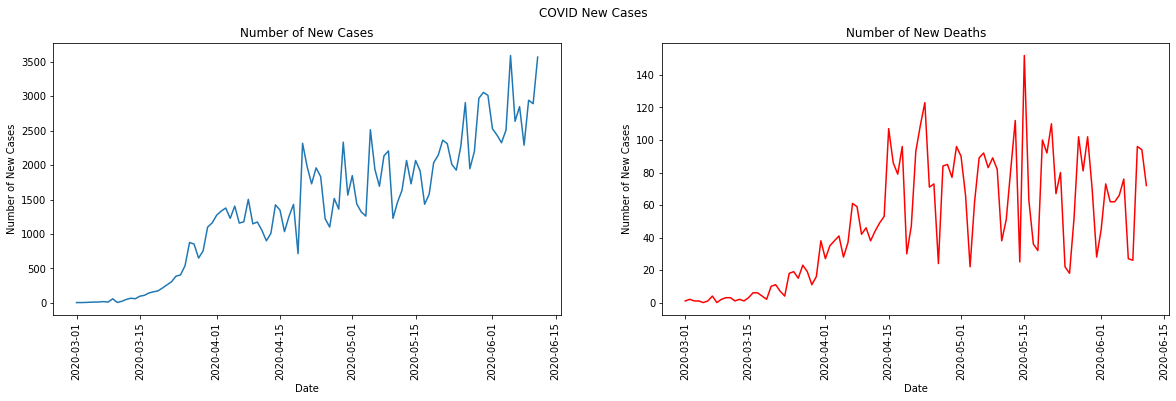

In [22]:
fig,axes= plt.subplots(1,2,figsize=(20,5))
fig.suptitle("COVID New Cases")
shrunk=total[total["date"]>="2020-03-01"]
axes[0].plot("date","new_cases", data=shrunk)
axes[0].set_title("Number of New Cases")
axes[1].plot("date","new_deaths", data=shrunk, color="red")
axes[1].set_title("Number of New Deaths")
for ax in axes: 
       ax.tick_params("x",labelrotation=90)
       ax.set_xlabel("Date")
       ax.set_ylabel("Number of New Cases")
        

These graphs represent the number of new cases /deaths and the growth rates from March 1st until June 9th.  The number of new cases has fluctuated greatly from day to day but has shown a trend of overall increase.  However, while the number of new deaths fluctuates a lot more, we do not see this same pattern of overall increase from April-15 to June. Additionally, looking closer at the rate of overall increase for new cases from the COVID new cases graphs, it appears that from April 15 to mid-May (approx. May-15th), the rate of overall increase is smaller than from mid-May to June-9th. This could be due to reopening policies and the protests. 

In [12]:
# Need to recalcuate growth percentages after groupby
g=[0]
for i in range(1,len(total["new_cases"])): 
        x= ((total["new_cases"][i]-total["new_cases"][i-1])/total["new_cases"][i-1])*100
        g.append(x)
total["cases_growth"]= g
h=[0]
for i in range(1,len(total["new_deaths"])): 
        x= ((total["new_deaths"][i]-total["new_deaths"][i-1])/total["new_deaths"][i-1])*100
        h.append(x)
total["death_growth"]= h

C:\Users\Pavan\anaconda3\envs\myenv_conda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  after removing the cwd from sys.path.
C:\Users\Pavan\anaconda3\envs\myenv_conda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in longlong_scalars
  after removing the cwd from sys.path.
C:\Users\Pavan\anaconda3\envs\myenv_conda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':
C:\Users\Pavan\anaconda3\envs\myenv_conda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in longlong_scalars
  if __name__ == '__main__':


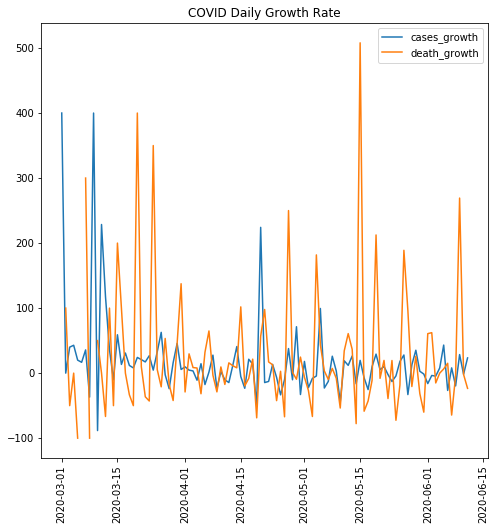

In [24]:
plt.figure(figsize=(8,8))
shrunk=total[total["date"]>="2020-03-01"]
plt.plot("date","cases_growth", data=shrunk)
plt.plot("date","death_growth", data=shrunk)
plt.xticks(rotation=90)
plt.legend();
plt.title("COVID Daily Growth Rate");

The COVID Percentage Daily Growth Rate is interesting as it shows some dates had an unusually high peak.  While the early peaks in March could be attributed to small numbers, the large peak in cases in Mid-April, and the large peak in deaths in Mid-May is interesting. There could be many possible reasons.  One reason could be delays in hospital/ other sources reporting, which could erroneously attribute more cases to a certain day.  Another reason could be abnormal social events. For instance, it may not be a coincidence that the spike in growth in Mid-April (approx.- 15th-20th) occurred during the increase in stay at home order protests (https://www.foxnews.com/us/california-protest-erupts-over-states-coronavirus-stay-at-home-rules). However, I do not know the exact reason and it could still be something else. 

Now that we understand how the Coronavirus has progressed in California as a whole, lets analyze the growth in specific counties and uncover which counties have been hit the hardest. To do this, I will be utilizing two metrics- average number of people who contract the coronavirus daily as a percentage of total population and the ratio of total death/cases. I chose to observe the percent of total population instead of the number of people, because I did not want to bias my results against small counties. Also, I decided to use the ratio of death/cases to understand where the virus is more deadly since the total percentage of population is very small and the death/cases ratio is a better representation off the killing efficiency of the virus.  

In [15]:
# Calculate the average number of people who contract the coronavirus daily
def average_new_cases_percent(table, start,end): 
    shrunk=table[(table["date"]>= start) & (table["date"]<= end) ]
    shrunk=shrunk.reset_index()
    return (np.mean(shrunk["new_cases"])/shrunk["e_totpop"][0])*100
def average_new_death_percent(table, start,end): 
    shrunk=table[(table["date"]>= start) &( table["date"]<= end)]
    shrunk= shrunk.reset_index()
    return (np.mean(shrunk["new_deaths"])/shrunk["e_totpop"][0])*100

def ave(d,start,end): 
    av_cases=[]
    av_deaths=[]
    for i in d["county"].unique(): 
        df=d[d["county"]==i]
        av_cases.append(average_new_cases_percent(df,start,end))
        av_deaths.append(average_new_death_percent(df,start,end))
    averages= pd.DataFrame()
    averages["county"]= d["county"].unique()
    averages["av_cases_daily"]= av_cases
    averages["av_deaths_daily"]= av_deaths
    print("Top 25 cases:")
    print(averages.sort_values(by="av_cases_daily", ascending=False).head(25).reset_index()[["county","av_cases_daily"]])

    return averages
    
    
    

In [17]:
# Combining the cases dataframe with a dataframe that contains the estimated population.(read in a later cell)#
new= gdf.merge(jo ,on="county")
new.head()

,index,date,county,cases,deaths,geometry,new_cases,new_deaths,cases_growth,death_growth,e_totpop
0,0,2020-01-25,Orange,1,0,POLYGON ((-13134488.10155519 3973319.471289119...,1,1,0.0,0.0,3132211
1,1,2020-01-26,Orange,1,0,POLYGON ((-13134488.10155519 3973319.471289119...,0,0,-100.0,-100.0,3132211
2,2,2020-01-27,Orange,1,0,POLYGON ((-13134488.10155519 3973319.471289119...,0,0,NaN,NaN,3132211
3,3,2020-01-28,Orange,1,0,POLYGON ((-13134488.10155519 3973319.471289119...,0,0,NaN,NaN,3132211
4,4,2020-01-29,Orange,1,0,POLYGON ((-13134488.10155519 3973319.471289119...,0,0,NaN,NaN,3132211


In [25]:
av=ave(new,"2020-03-01","2020-6-09")

Top 25 cases:
            county  av_cases_daily
0         Imperial        0.021368
1            Kings        0.014526
2      Los Angeles        0.006480
3           Tulare        0.005805
4            Modoc        0.005535
5    Santa Barbara        0.004808
6        Riverside        0.004344
7             Kern        0.003889
8   San Bernardino        0.003501
9             Mono        0.003376
10   San Francisco        0.003252
11       San Mateo        0.003229
12       San Diego        0.002675
13          Fresno        0.002498
14         Alameda        0.002471
15       Del Norte        0.002465
16          Orange        0.002461
17           Marin        0.002363
18          Alpine        0.002346
19      San Benito        0.002110
20        Mariposa        0.002109
21        Monterey        0.002087
22      Stanislaus        0.002053
23     San Joaquin        0.001989
24          Merced        0.001800


C:\Users\Pavan\anaconda3\envs\myenv_conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


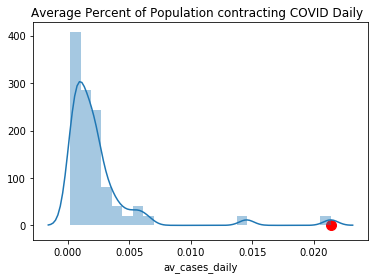

In [27]:
Imperial= av.loc[34][1]
sb.distplot(av["av_cases_daily"]);
plt.scatter(Imperial, 0, color='red', s=100);
plt.title("Average Percent of Population contracting COVID Daily  ");

The distribution seems to be right skewed. Most of the percentages are between .001% and .002%. The outliers are Imperial (shown in red), with a percentage of approximately 0.0213%, and Kings County with a percentage of approximately 0.0145%. These are more than 10x higher than the median California county! Following these counties are Los Angeles County with approx. 0.0065%, Tulare with approx.  0.0058%, and Modoc with approx. 0.0055%. It is important to note that these are not the percentage of people with COVID-19 cases (to come later), but instead represent the percentage of people we can expect to obtain COVID-19 on a typical day.   

In [13]:
# only kept Counties with 100+ cases
covid["date"]= pd.to_datetime(covid["date"])
final= covid[covid["date"]=="2020-6-09"]
final["d/c"]=final["deaths"]/ final["cases"]
sfinal= final[final["cases"]>99]
print("Top 25 death ratio:")
print(sfinal.sort_values(by="d/c", ascending=False).head(25).reset_index().drop("index", axis=1)[["county","cases","deaths","d/c"]])

Top 25 death ratio:
            county  cases  deaths       d/c
0             Yolo    228      24  0.105263
1      Santa Clara   3017     150  0.049718
2      Los Angeles  65822    2707  0.041126
3           Tulare   2381      94  0.039479
4        San Mateo   2437      93  0.038162
5        Riverside   9590     365  0.038060
6       Sacramento   1623      61  0.037585
7           Solano    615      23  0.037398
8         Humboldt    112       4  0.035714
9        San Diego   8792     312  0.035487
10  San Bernardino   6417     224  0.034907
11      Stanislaus    991      33  0.033300
12     San Joaquin   1308      39  0.029817
13          Placer    304       9  0.029605
14         Alameda   4006     110  0.027459
15           Marin    620      17  0.027419
16         Ventura   1382      35  0.025326
17    Contra Costa   1774      43  0.024239
18          Orange   7786     185  0.023761
19          Fresno   2286      48  0.020997
20            Napa    158       3  0.018987
21          

C:\Users\Pavan\anaconda3\envs\myenv_conda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


C:\Users\Pavan\anaconda3\envs\myenv_conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


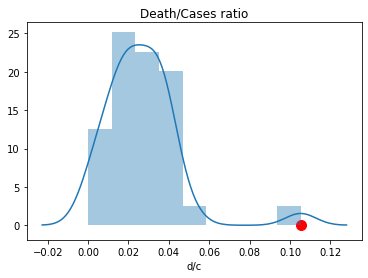

In [31]:
Yolo=sfinal.sort_values(by="d/c", ascending=False).head(1)["d/c"][1822]
sb.distplot(sfinal["d/c"]);
plt.scatter(Yolo, 0, color='red', s=100)
plt.title("Death/Cases ratio");

In [33]:
# Shapiro Wilk Test to test for normality ; no YOLO
from scipy import stats
no=sfinal.drop(1822)
print(no.skew())
p_value=stats.shapiro(no["d/c"])[1]
if p_value< .05: 
    print("Reject Null hypothesis of normality")
else: 
    print("Fail to reject Null Hypothesis")

cases     5.321112
deaths    5.427643
d/c      -0.109096
dtype: float64
Fail to reject Null Hypothesis


Like the percentage distribution, there is an outlier in the total death/cases ratio. However, this time it is Yolo county, with a death: cases ratio of approximately 0.11 which is approximately double the next largest county (San Diego), which has a ratio of 0.05. Following San Diego is Los Angeles County with 0.041, Tulare 0.039, and San Mateo 0.038. Yolo Counties position on top could be due to a combination of its low total number of cases (only 228), and the "riskiness" of the population who have contracted the virus. Also, it is interesting that Los Angeles and Tulare have maintained high positions on both lists, while Kings and Imperial counties are not even in the top 25 when considering death: cases ratio. Furthermore, because some counties have very few cases and deaths, I decided to limit the distribution to counties with 100 or more cases. 

Also, it is apparent from the histogram and the Shapiro–Wilk test, that this distribution is normal when Yolo County is removed.  

Now, let’s consider the number of people with COVID-19 as a percent of population as of June 9th:

In [14]:
# read in dataset with population numbers
social= pd.read_csv(r"C:\Users\Pavan\OneDrive\Desktop\COVID19Data\cdcs-social-vulnerability-index-svi-2016-overall-svi-county-level.csv")
social= social[social["state"]=="CALIFORNIA"]
pop= social[["county",'e_totpop']]
jo=pop.copy()

In [15]:
# join the dataset with COVID-19 cases 
final1=covid[covid["date"]=="2020-6-09"]
grouped=pop.merge(final1, on="county", how="inner")


In [16]:
# Calculate percent 
grouped["casesp"]= (grouped["cases"]/grouped["e_totpop"])*100
grouped["deathsp"]= (grouped["deaths"]/grouped["e_totpop"])*100
grouped.head()

,county,e_totpop,date,cases,deaths,geometry,casesp,deathsp
0,Butte,223877,2020-06-09,71,1,POLYGON ((-13565004.79317821 4798394.124309788...,0.031714,0.000447
1,El Dorado,183000,2020-06-09,111,0,POLYGON ((-13482864.23157302 4681232.506745442...,0.060656,0.000000
2,Humboldt,135182,2020-06-09,112,4,"POLYGON ((-13834943.3747943 4982761.91231769, ...",0.082851,0.002959
3,Inyo,18326,2020-06-09,22,1,POLYGON ((-13173280.42113141 4391099.816179019...,0.120048,0.005457
4,Nevada,98639,2020-06-09,50,1,"POLYGON ((-13437793.97916356 4791065.40571715,...",0.050690,0.001014


In [39]:
print(grouped.sort_values("casesp", ascending=False)[["county","e_totpop","cases","casesp"]].reset_index().drop("index", axis=1).head(25))

            county  e_totpop  cases    casesp
0         Imperial    178807   3133  1.752169
1            Kings    150261   1637  1.089438
2      Los Angeles  10057155  65822  0.654479
3           Tulare    455769   2381  0.522414
4    Santa Barbara    439395   1838  0.418302
5        Riverside   2323892   9590  0.412670
6             Kern    871337   2880  0.330527
7    San Francisco    850282   2796  0.328832
8        San Mateo    754748   2437  0.322889
9   San Bernardino   2106754   6417  0.304592
10       San Diego   3253356   8792  0.270244
11            Mono     14051     37  0.263326
12         Alameda   1605217   4006  0.249561
13          Orange   3132211   7786  0.248578
14           Marin    259358    620  0.239052
15          Fresno    963160   2286  0.237344
16      San Benito     58051    109  0.187766
17      Stanislaus    530561    991  0.186783
18     San Joaquin    714860   1308  0.182973
19        Monterey    430201    763  0.177359
20       Del Norte     27628     4

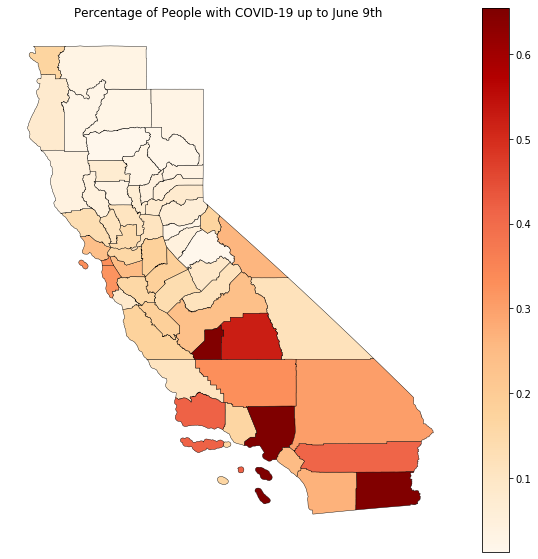

In [40]:
plt.close()
changed= grouped.copy()
piv_cases=geo.GeoDataFrame(changed)
piv_cases["casesp"]= piv_cases["casesp"].replace(max(piv_cases["casesp"]),.65)
piv_cases["casesp"]= piv_cases["casesp"].replace(max(piv_cases["casesp"]),.65)
ax= piv_cases.plot(column="casesp",cmap="OrRd",figsize=(10,10),legend=True,edgecolor="black",linewidth=0.4)
ax.set_title("Percentage of People with COVID-19 up to June 9th ")
ax.set_axis_off()

This map clearly shows that the counties with a higher percentage of COVID-19 cases are mostly in Southern California, with the number of lightly impacted counties increasing as we progress north. Furthermore, the county with the highest percentage is Imperial with approx. 1.75% infected, which is more than 10x higher than the median county. Following Imperial is Kings with approx.  1.08% infected, Los Angeles with approx. 0.65% infected, Tulare with approx. 0.52% infected and Santa Barbara with approx. 0.41 % infected. Taking all three of these statistics into account, I believe that the county hit the hard by COVID-19 has been Los Angeles county. Even though Imperial county has a very high percentage of cases, LA county's top three presence when it comes to cases and deaths makes it the hardest hit county.  

## Analysis of Risk Factors

### Source : CDC Social Vulnerability Score 2016 

The source I will be analyzing is the Center for Disease Controls Social Vulnerability score data, which I obtained from Kaggle. This dataset, which is on the county level, comprises of features that can be grouped into four categories- Socioeconomic Status, Household Composition & Disability, Minority Status & Language, and Housing & Transportation. Furthermore, in the dataset, one feature is represented in three different formats- as a value, as a percent, and as a percentile. In my analysis, I will only look at the values as a percentage.

In [17]:
# keep all features represented as a percent 
keep=["county","geometry","ep_pov","ep_unemp","ep_nohsdp",
     "ep_age65","ep_age17","ep_disabl","ep_sngpnt",
      "ep_minrty","ep_limeng",
     "ep_munit","ep_mobile","ep_crowd","ep_noveh","ep_groupq"]

In [18]:
social=social[keep]


In [19]:
# combinbe cases and SVI data
social_cases=grouped.merge(social,on="county")
social_cases.head()

,county,e_totpop,date,cases,deaths,geometry_x,casesp,deathsp,geometry_y,ep_pov,...,ep_age17,ep_disabl,ep_sngpnt,ep_minrty,ep_limeng,ep_munit,ep_mobile,ep_crowd,ep_noveh,ep_groupq
0,Butte,223877,2020-06-09,71,1,POLYGON ((-13565004.79317821 4798394.124309788...,0.031714,0.000447,"POLYGON ((-122.068757423 39.8422271365, -122.0...",21.3,...,20.3,17.2,7.9,26.6,2.5,7.9,12.7,2.9,7.0,2.5
1,El Dorado,183000,2020-06-09,111,0,POLYGON ((-13482864.23157302 4681232.506745442...,0.060656,0.000000,"POLYGON ((-121.141022132 38.7119851179, -121.1...",9.8,...,21.0,13.2,6.4,21.3,2.0,4.3,4.9,2.1,4.7,1.0
2,Humboldt,135182,2020-06-09,112,4,"POLYGON ((-13834943.3747943 4982761.91231769, ...",0.082851,0.002959,"POLYGON ((-124.408614851 40.4432059861, -124.3...",21.0,...,19.5,16.9,9.7,24.6,1.7,3.8,8.3,3.8,7.6,3.1
3,Inyo,18326,2020-06-09,22,1,POLYGON ((-13173280.42113141 4391099.816179019...,0.120048,0.005457,"POLYGON ((-118.790043598 37.3940371695, -118.7...",10.8,...,20.6,13.6,9.4,36.0,2.6,4.4,23.6,1.7,8.3,3.4
4,Nevada,98639,2020-06-09,50,1,"POLYGON ((-13437793.97916356 4791065.40571715,...",0.050690,0.001014,"POLYGON ((-121.279762204 39.1098501405, -121.2...",12.1,...,17.8,14.8,5.8,14.4,1.4,3.8,5.5,1.9,4.6,1.2


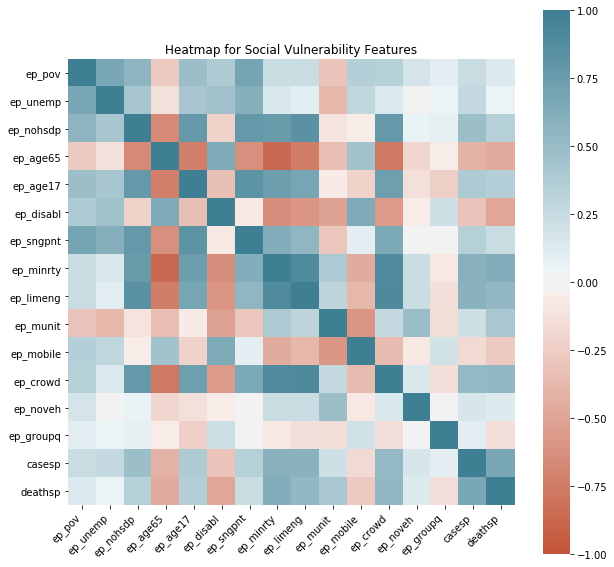

In [21]:
# Create correlation heatmap
plt.figure(figsize=(10,10))
plt.title("Heatmap for Social Vulnerability Features")
keep1= keep[2:]+["casesp","deathsp","county"]
pplot= social_cases[keep1]
pcorr= pplot.corr()
ax=sb.heatmap(pcorr,vmin=-1, vmax=1, center=0, cmap=sb.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');


To determine which features are most relevant, I will perform a multivariate regression with the social vulnerability variables as the features and the number of cases as a percent of county population as the label. However, first, I did some preprocessing. The first step of the preprocessing was to choose the best features that minimize co-linearity. While there are statistical tools that can do this like the Variation Inflation Factor, I decided to create a heatmap of the correlation coefficients and choose features that intuitively related to the spread of COVID-19 and are not that similar to increase transparency. Here are the features I picked and why:

ep_pov: I chose the Percentage of persons below poverty, as poverty may influence social distancing adherence.  

ep_crowd: I chose the percentage of occupied housing units with more people than rooms. This seems vital to the spread of COVID-19 as this means that there would be more frequent human interactions.  This feature seems to be correlated with the Age65 and minorities which is why I did not include these features in my model, as I believe crowd could explain why these communities could experience any disparities.

ep_munit:  I chose the percentage of housing in structures with 10 or more units estimate for the same reason as ep_crowd.  Interestingly, these two features are not linearly correlated, which makes it an appropriate choice.  


In [34]:
interested=["ep_pov","ep_munit","ep_crowd","casesp"]
pplot1=pplot[interested]



My next preprocessing step was to remove outliers. This is a tough task since this is a small dataset. While removing lots of large data points will increase our r^2 performance, we also might lose important information. Therefore, to balance this I decided to just remove Kings and Imperial County. 

In [35]:
# find where counties are and remove
print(np.where(pplot["county"]=="Imperial"))
print(np.where(pplot["county"]=="Kings"))

(array([54], dtype=int32),)
(array([55], dtype=int32),)


In [36]:
none=pplot.drop([54,55])

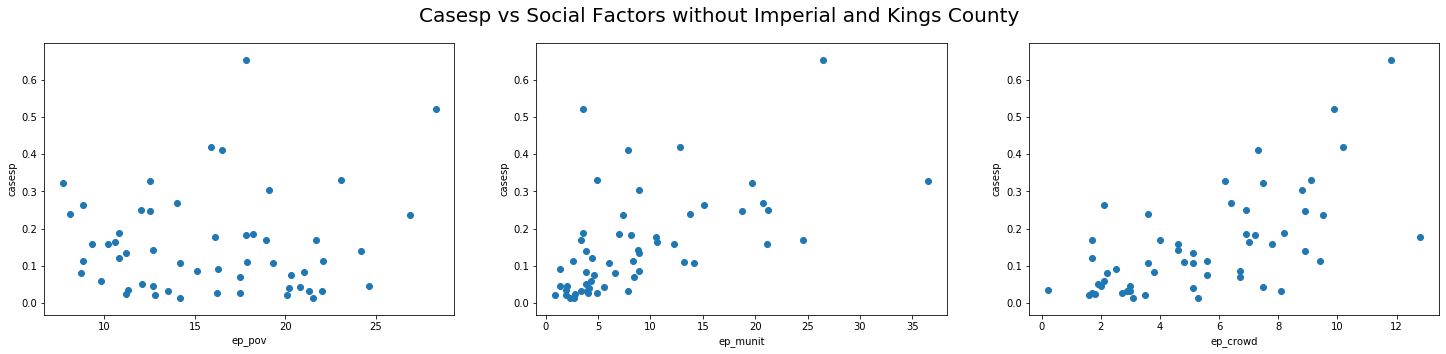

In [37]:
v=["ep_pov","ep_munit","ep_crowd"]
fig,ax=plt.subplots(1,3,figsize=(25,5))
fig.suptitle('Casesp vs Social Factors without Imperial and Kings County', fontsize=20)
for rows,j in zip(ax,v): 
    rows.scatter(x=none[j],y=none["casesp"])
    rows.set_xlabel(j)
    rows.set_ylabel("casesp")

Here are scatterplots which compare our features.  From the first plot, poverty is not correlated. Thus, I decided not to use it for the regression.  By observing the plots for crowd, I decided that adding a square polynomial feature would be beneficial due to the fact that the cases percentage seems to grow faster for 8-12 percent than for 2-6 percent. I decided to leave ep_munit alone. Initially, it may appear that ep_munit could benefit from the addition of a fractional polynomial feature since it appears to level off after 20%. However, the larger datapoints are sparse, and therefore there is reason to believe that this phenomenon could just be caused by a lack of data.  The final step was to min-max scale the variables. 

In [39]:
# need to scale the variables 
def min_max(x): 
    return (x- min(x))/(max(x)-min(x))
    

In [40]:
none["crowd2"]= none["ep_crowd"]**2

In [42]:
for i in ["ep_munit","ep_crowd","crowd2"]: 
    none[i]= min_max(none[i])

In [43]:
# build stats models
import statsmodels.api as sm
none["intercept"]=1
mod1= sm.OLS(none["casesp"],none[["intercept","ep_munit","ep_crowd","crowd2"]])
res1=mod1.fit()

In [44]:
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casesp   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     23.83
Date:                Sun, 14 Jun 2020   Prob (F-statistic):           8.85e-10
Time:                        17:30:42   Log-Likelihood:                 56.512
No. Observations:                  55   AIC:                            -105.0
Df Residuals:                      51   BIC:                            -97.00
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0321      0.040      0.795      0.430      -0.049       0.113
ep_munit       0.2788      0.062      4.514      0.000       0.155       0.403
ep_crowd      -0.0744      0.204     -0.365      0.716      -0.483       0.335
crowd2         0.3937      0.212      1.855      0.069      -0.032       0.820
==============================================================================
Omnibus:                       11.816   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               17.754
Skew:                           0.681   Prob(JB):                     0.000140
Kurtosis:                       5.427   Cond. No.                         27.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
mod2= sm.OLS(none["casesp"],none[["intercept","ep_munit","ep_crowd"]])
res2=mod2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casesp   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     32.50
Date:                Sun, 14 Jun 2020   Prob (F-statistic):           6.97e-10
Time:                        17:51:39   Log-Likelihood:                 54.716
No. Observations:                  55   AIC:                            -103.4
Df Residuals:                      52   BIC:                            -97.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0256      0.026     -0.975      0.334      -0.078       0.027
ep_munit       0.2698      0.063      4.284      0.000       0.143       0.396
ep_crowd       0.2898      0.056      5.197      0.000       0.178       0.402
==============================================================================
Omnibus:                       14.147   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.557
Skew:                           1.022   Prob(JB):                     0.000254
Kurtosis:                       4.744   Cond. No.                         6.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

decided to preform two least squares regressions. The first regression is the model with all our features.  The P-values show ep_munit is an extremely significant variable as it has a very small p-value.  Crowd 2 also has a small p-value of 0.069, though it is not significant in this model as this is above the custom 0.05 threshold. Furthermore, it appears that ep_crowd is not significant in this model. The model explained 58.4% of the variation(r^2). The second model is a simpler model, as it contains just the variables without the squared feature. In this model, both variables are statistically significant with low p-values. Also, the R-Squared and adjusted R-squared values are only about .02 lower than the more complex model. This increases favorability for the simpler model as it is more transparent and almost as effective. 

From this regression analysis, it is clear that the ep_munit and ep_crowd characteristics are very important characteristics that could explain the difference in spread of COVID-19 in California. Just these two variables explain more than a majority (55.6%) of the variation in total cases as a percentage as a population.  Intuitively, this provides evidence to the theory that counties with more apartment/dorm-like structures, should have a higher COVID case percentage since people are in more frequent contact with each other.  


Lets visualize these two features: 

In [98]:
print(social.sort_values("ep_munit", ascending=False)[["county","ep_munit"]].reset_index().drop("index", axis=1).loc[:9])

          county  ep_munit
0  San Francisco      36.5
1    Los Angeles      26.5
2         Alpine      24.6
3        Alameda      21.2
4    Santa Clara      21.1
5      San Diego      20.7
6      San Mateo      19.7
7         Orange      18.7
8           Mono      15.1
9           Yolo      14.2


In [99]:
print(social.sort_values("ep_crowd", ascending=False)[["county","ep_crowd"]].reset_index().drop("index", axis=1).loc[:9])

          county  ep_crowd
0       Monterey      12.8
1    Los Angeles      11.8
2       Imperial      10.4
3  Santa Barbara      10.2
4         Tulare       9.9
5         Fresno       9.5
6         Madera       9.4
7          Kings       9.1
8           Kern       9.1
9         Merced       8.9


In [63]:
new=social.merge(cali, left_on="county",right_on="NAME", how="inner")[["county","geometry_y","ep_crowd","ep_munit"]]
new.rename(columns = {'geometry_y':'geometry'}, inplace = True)

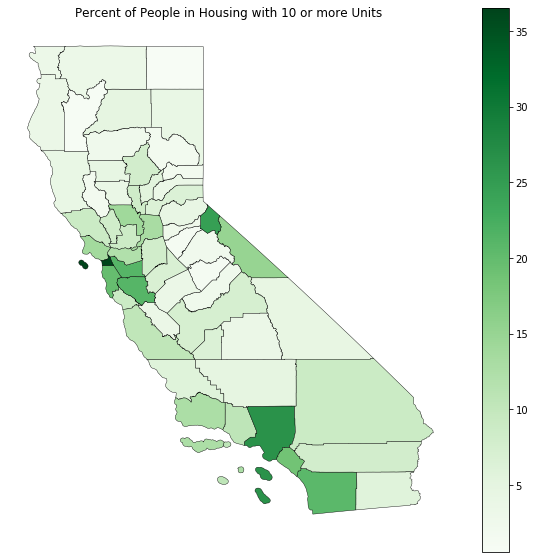

In [103]:
plt.close()

new=geo.GeoDataFrame(new)
ax= new.plot(column="ep_munit",cmap="Greens",figsize=(10,10),legend=True,edgecolor="black",linewidth=0.4)
ax.set_title("Percent of People in Housing with 10 or more Units ")
ax.set_axis_off()

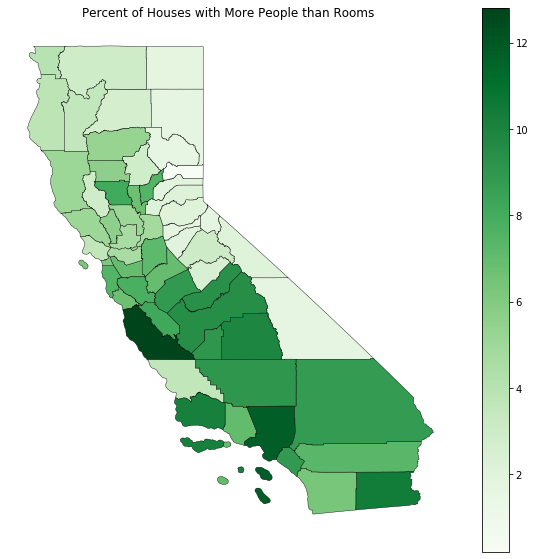

In [64]:
plt.close()

new=geo.GeoDataFrame(new)
ax= new.plot(column="ep_crowd",cmap="Greens",figsize=(10,10),legend=True,edgecolor="black",linewidth=0.4)
ax.set_title("Percent of Houses with More People than Rooms ")
ax.set_axis_off()

The first map represents MUNIT while the second represent CROWD.  Regarding the first map, it shows that a majority of this type of apartment housing is concentrated in urban, high populated counties. In fact, San Francisco County leads this category with 36.5% of its housing in this manner. This is followed by Los Angeles County (26.5%), Alpine(24.6%), Alameda(21.2%), and Santa Clara(21.1%).  This is to be expected of these regions as they contain a high volume of people in a confined area.  However, the percentages depicted by the second map of overcrowded houses seems to be distributed more evenly across California.  Central California seems to possess lots of crowding relative to the other counties, which differs from the second map. The top crowded counties are Monterey(12.8%), Los Angeles (11.8%), Imperial(10.4%), Santa Barbara(10.2%), Tulare(9.9%).  It is especially noteworthy that Los Angeles county, which I deemed the hardest hit by COVID-19 is near the top on both lists. 

In [120]:
# read in Google Mobility Data
glob=pd.read_csv(r"C:\Users\Pavan\OneDrive\Desktop\COVID19Data\Global_Mobility_Report.csv")
usa= glob[glob["country_region"]== "United States"]
cal= usa[usa["sub_region_1"]== "California"]
cal.head()

C:\Users\Pavan\anaconda3\envs\myenv_conda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
218009,US,United States,California,NaN,US-CA,NaN,2/15/2020,1.0,1.0,19.0,1.0,-1.0,0.0
218010,US,United States,California,NaN,US-CA,NaN,2/16/2020,5.0,0.0,31.0,1.0,-1.0,-1.0
218011,US,United States,California,NaN,US-CA,NaN,2/17/2020,9.0,1.0,44.0,-12.0,-38.0,8.0
218012,US,United States,California,NaN,US-CA,NaN,2/18/2020,0.0,0.0,16.0,3.0,0.0,0.0
218013,US,United States,California,NaN,US-CA,NaN,2/19/2020,0.0,0.0,13.0,1.0,0.0,0.0


In [134]:
cali_total= cal[cal["sub_region_2"].isna()==True]

In [136]:
cali_total["date"]=pd.to_datetime(cali_total["date"])

C:\Users\Pavan\anaconda3\envs\myenv_conda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [139]:
col=cali_total.columns[7:]

In [154]:
col[3:6]

Index(['transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [173]:
cal["date"]=pd.to_datetime(cal["date"])

C:\Users\Pavan\anaconda3\envs\myenv_conda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


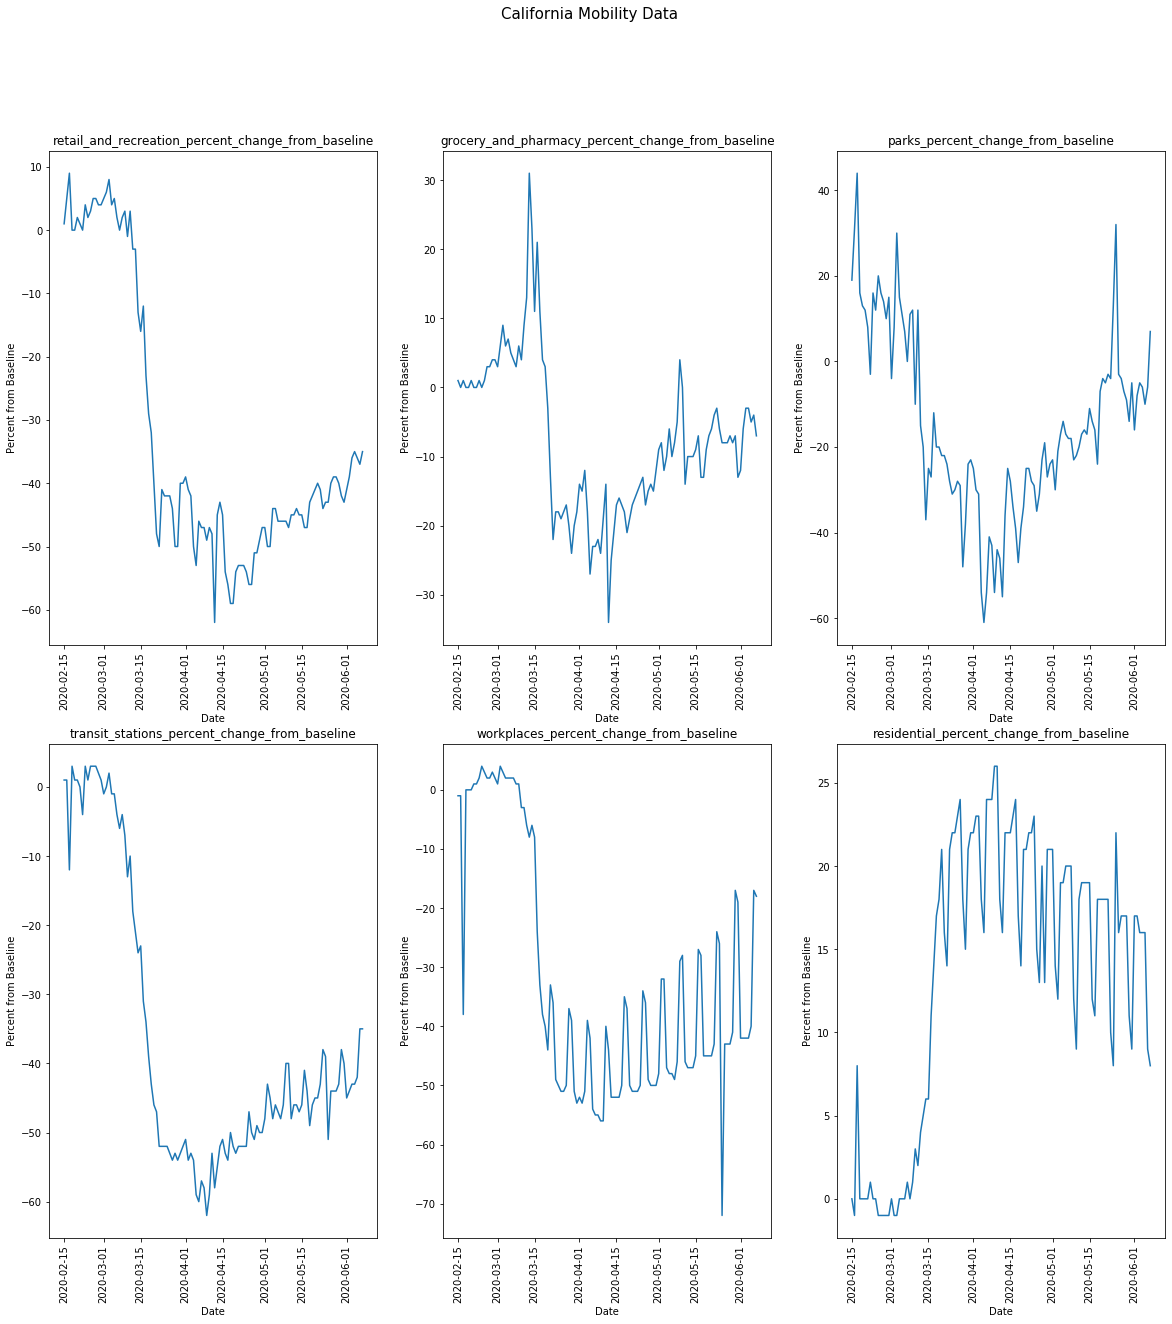

In [171]:
plt.close()
fig, axes= plt.subplots(2,3, figsize=(20,20))
fig.suptitle("California Mobility Data", size=15);
plt.subplots_adjust(wspace = 0.2,hspace = 0.2)
for i in range(2):
    x=col[:3]
    y=col[3:6]
    for j in range(3): 
        if i==0: 
            axes[i,j].plot(cali_total["date"],cali_total[x[j]])
            axes[i,j].tick_params(axis='x',rotation=90);
            axes[i,j].set_title(x[j]);
            axes[i,j].set_ylabel("Percent from Baseline");
            axes[i,j].set_xlabel("Date");
        if i==1: 
            axes[i,j].plot(cali_total["date"],cali_total[y[j]])
            axes[i,j].tick_params(axis='x',rotation=90);
            axes[i,j].set_title(y[j]);
            axes[i,j].set_ylabel("Percent from Baseline");
            axes[i,j].set_xlabel("Date");

Furthermore, the strong relationship between the percentage of COVID-19 cases in a county and housing characteristics may be due in part to California’s social distancing policies.  The time series graphs represent Google Mobility for grocery/pharmacy, parks, transit, retail/recreation, residential and workplace.  While Mobility in places like parks and grocery have returned to base levels recently, overall, the mobility in public places has been drastically reduced during the period. This trend and the drastic increase in residential mobility are strong indicators that the social distancing efforts have been efficient. However, the trade-off with this policy is that it leads people in overcrowded and compact living spaces at risk, thus providing a potential hypothesis to explain the results of the regression. 

## Analysis of Testing Access, and ICU availability across California

### Testing Access

The data for testing access was obtained on Kaggle by the organization Coders against COVID-19. This dataset is a crowdsourced list of testing centers across the United States. 

In [70]:
# read in data
health=pd.read_csv(r"C:\Users\Pavan\OneDrive\Desktop\COVID19Data\crowd-sourced-covid-19-testing-locations.csv")
health.head()

,location_id,is_verified,is_hidden,is_location_screening_patients,is_location_collecting_specimens,location_name,location_address_street,location_address_locality,location_address_region,location_address_postal_code,...,is_location_only_testing_patients_that_meet_criteria,is_location_by_appointment_only,location_contact_phone_appointments,location_contact_url_appointments,location_specific_testing_criteria,additional_information_for_patients,data_source,is_ready_for_prod,location_address_district,geometry
0,a3b3214a-e128-4c68-ac18-a467482f1ab8,t,f,t,t,Providence Alaska Medical Center,3200 Providence Drive,Anchorage,AK,99508.0,...,t,t,907-562-2211,https://virtual.providence.org/,https://www.providence.org/patients-and-visito...,NaN,provider website,NaN,NaN,POINT (-149.81894 61.189842)
1,823ece97-d901-4dd6-9a4e-b5a86d61230e,t,f,f,f,State of Alaska Health and Social Services,3601 C Street,Anchorage,AK,99811.0,...,t,t,1-800-499-2964,NaN,NaN,We serve 280 small communities and villages. I...,provider website,NaN,NaN,POINT (-149.88658 61.18746)
2,f15df801-b396-45d7-b689-c0cc7fca3e0b,t,f,t,t,Jessie Norma Jim Health Center,725 Relay Road,Angoon,AK,99820.0,...,t,t,907-966-8799,NaN,https://covid19.searhc.org/,"For questions, please call 966.8799 (7 am - 4 ...",provider website,NaN,NaN,POINT (-134.5802606 57.499091)
3,ff18e912-fe0f-4823-a4cb-698e3f92a345,t,f,t,t,Bethel Center and Itinerant Nursing Services,1490 State Hwy,Bethel,AK,99559.0,...,t,t,NaN,NaN,NaN,NaN,provider website,NaN,NaN,POINT (-161.7696992 60.7927467)
4,372769c0-2497-4353-8a4f-035e9e575852,t,f,t,t,Craig Public Health Center,1800 Craig Klawock Highway,Craig,AK,99921.0,...,t,t,NaN,NaN,NaN,NaN,provider website,NaN,NaN,POINT (-133.1254048 55.4840003)


In [71]:
# California represented two ways CA and California
health["location_address_region"].unique()

array(['AK', 'AL', 'Arizona', 'Arkansas', 'AZ', 'CA', 'California',
       'Colorado', 'Connecticut', 'CT', 'FL', 'Florida', 'GA', 'Hawaii',
       'HI', 'IA', 'ID', 'Idaho', 'IL', 'IN', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'KS', 'KY', 'LA', 'Louisiana', 'MA', 'Maryland',
       'Massachusetts', 'MD', 'ME', 'MI', 'Michigan', 'Minnesota',
       'Mississippi', 'MN', 'MO', 'Montana', 'MS', 'MT', 'NC', 'ND',
       'Nebraska', 'New Mexico', 'NH', 'NJ', 'North Carolina',
       'North Dakota', 'NV', 'NY', 'OH', 'Ohio', 'OK', 'Oklahoma',
       'Oregon', 'PA', 'Pennsylvania', 'RI', 'SC', 'SD', 'South Carolina',
       'South Dakota', 'Tennessee', 'TN', 'TX', 'UT', 'Utah', 'Vermont',
       'Virginia', 'WA', 'West Virginia', 'WI', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [72]:
# Find just california and CA
cali_health=health[(health["location_address_region"]=="CA" )|(health["location_address_region"]=="California")]
cali_health.head()

,location_id,is_verified,is_hidden,is_location_screening_patients,is_location_collecting_specimens,location_name,location_address_street,location_address_locality,location_address_region,location_address_postal_code,...,is_location_only_testing_patients_that_meet_criteria,is_location_by_appointment_only,location_contact_phone_appointments,location_contact_url_appointments,location_specific_testing_criteria,additional_information_for_patients,data_source,is_ready_for_prod,location_address_district,geometry
198,e7ffa38c-4d4e-49d7-8625-a6bc117f2be1,t,f,t,t,Carbon Health - Berkeley,2920 Telegraph Ave,Berkeley,CA,94705.0,...,t,t,510-686-3621,https://patient.carbonhealth.com/?lng=en#/sche...,NaN,Please use the COVID-19 check my symptoms tool.,provider website,NaN,NaN,POINT (-122.2600272 37.8569028)
199,8c02cfac-815c-42eb-82ca-26a8d7960b78,t,f,t,t,El Camino Health Urgent Care - Cupertino,19600 Vallco Pkwy Ste 170,Cupertino,CA,95014.0,...,t,t,650-338-4776,https://patient.carbonhealth.com/?lng=en#/sche...,NaN,Please use the COVID-19 check my symptoms tool.,provider website,NaN,NaN,POINT (-122.01135 37.32561)
200,cc7e4dc1-e0c4-4092-818f-ae7a66e2dbd0,t,f,t,t,NorthBay HealthCare - Fairfield,"1320 Travis Blvd, Suite C",Fairfield,CA,94533.0,...,t,t,707-646-4000,https://patient.carbonhealth.com/?lng=en#/sche...,NaN,Please use the COVID-19 check my symptoms tool.,provider website,NaN,NaN,POINT (-122.050545 38.25821)
201,30615bb2-78f5-49e9-a02b-176558358c62,t,f,t,t,Stanford Primary Care in Los Altos,960 N. San Antonio Road,Los Altos,CA,94022.0,...,t,t,650-498-9000,NaN,NaN,https://med.stanford.edu/covid19.html,provider website,NaN,NaN,POINT (-122.114334 37.399475)
202,b797681e-37cd-4755-976e-1d55c34389aa,t,f,t,t,Carbon Health - Echo Park,"2110 Sunset Blvd, Suite M",Los Angeles,CA,90026.0,...,t,t,833-873-2852,https://patient.carbonhealth.com/?lng=en#/sche...,NaN,Please use the COVID-19 check my symptoms tool.,provider website,NaN,NaN,POINT (-118.26395 34.077534)


In [73]:
cali_health.shape

(182, 27)

In [75]:
len(cali_health["location_name"].unique())

130

In [79]:
cali_health["is_location_screening_patients"].value_counts()

t    170
f     12
Name: is_location_screening_patients, dtype: int64

There are a total of 182 centers in California in this dataset. However, only 170 centers screen for COVID-19.

In [80]:
# The following cells make sure the coordinate system is same for plotting
screening= cali_health[cali_health["is_location_screening_patients"]=="t"]

In [81]:
screening=geo.GeoDataFrame(screening)


In [82]:
cali.crs = {'init' :'epsg:4326'}

In [83]:
screening.crs=cali.crs

In [84]:
screening.drop("geometry", axis=1, inplace=True)

In [85]:
gdf = geo.GeoDataFrame(
    screening, geometry=geo.points_from_xy(screening["lng"], screening["lat"]))

In [86]:
gdf.crs=cali.crs

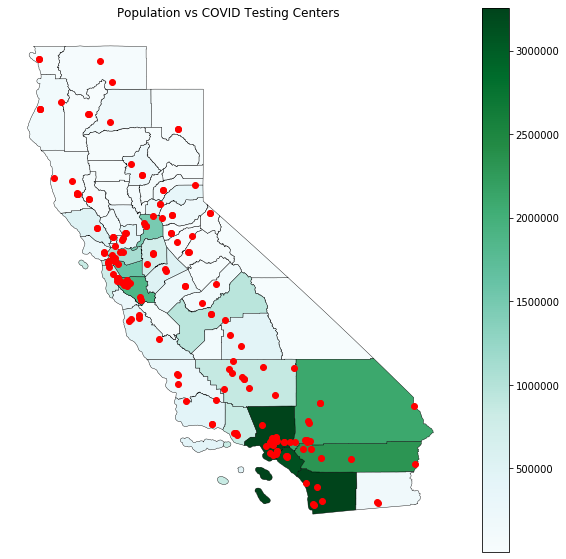

In [87]:
# Note: Because LA has such a large population, using the real population of LA creates a poor map. Therefore, I changed it to another value. The axis is still correct. 
plt.close()
piv_cases=geo.GeoDataFrame(grouped)
piv_cases.crs= cali.crs
piv_cases["e_totpop"]=piv_cases["e_totpop"].replace(max(piv_cases["e_totpop"]),3253356)

base= piv_cases.plot(column="e_totpop",cmap='BuGn',figsize=(10,10),legend=True,edgecolor="black",linewidth=0.4)
gdf = gdf.to_crs({'init': 'epsg:3857'})
ax=gdf.plot(ax=base,figsize=(10,10),zorder=2,color="red")
ax.set_title("Population vs COVID Testing Centers ")
ax.set_axis_off()

The question of whether there are certain groups of people that are restricted access to testing can only truly be answered at a county level. However, to get a general sense if there were any high population areas that did not have any adequate testing centers, I decided to plot the COVID testing centers on top of a population map of California. It appears that the testing centers are concentrated in high population counties with lower population counties having relatively fewer testing centers. This is logical as the more populous areas should have more resources allocated towards them. 

### ICU Availability

The data for ICU bed counts and COVID patients win ICU where obtained by the California Department of Public Health. 

In [88]:
# read in Data
bed_counts=pd.read_csv(r"C:\Users\Pavan\OneDrive\Desktop\COVID19Data\bed_counts.csv")
bed_counts.head()

,COUNTY_NAME,FAC_FDR,FACILITY_COUNT,BED_CAPACITY,ACUTE PSYCHIATRIC CARE,ACUTE RESPIRATORY CARE,BURN,CHEMICAL DEPENDENCY RECOVERY,CORONARY CARE,INTENSIVE CARE,INTENSIVE CARE NEWBORN NURSERY,INTERMEDIATE CARE,LABOR AND DELIVERY,PEDIATRIC,PEDIATRIC INTENSIVE CARE UNIT,PERINATAL,REHABILITATION,RENAL TRANSPLANT,UNSPECIFIED GENERAL ACUTE CARE
0,ALPINE,GENERAL ACUTE CARE HOSPITAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,SIERRA,GENERAL ACUTE CARE HOSPITAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,SUTTER,GENERAL ACUTE CARE HOSPITAL,1,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14
3,MONO,GENERAL ACUTE CARE HOSPITAL,1,17,0,0,0,0,0,2,0,0,0,0,0,2,0,0,13
4,MARIPOSA,GENERAL ACUTE CARE HOSPITAL,1,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18


In [89]:
# change Counties to Lowercase
bed_counts["county"]= [i.lower() for i in bed_counts["COUNTY_NAME"]]

In [90]:
# Capitalize first letter of each word in County Name 
def capital(ls): 
    if len(ls)==1: 
        return ls[0].capitalize()
    else: 
        return ls[0].capitalize()+" " +capital(ls[1:])

In [91]:
bed_counts["county"]= [capital(i.split())for i in bed_counts["county"]]

In [92]:
icu_beds= bed_counts[["county","INTENSIVE CARE"]]

In [93]:
# Get ICU COVID data
icu_counts=pd.read_csv(r"C:\Users\Pavan\OneDrive\Desktop\COVID19Data\icu_cases.csv")
icu_counts.head()

,County Name,Most Recent Date,Total Count Confirmed,Total Count Deaths,COVID-19 Positive Patients,Suspected COVID-19 Positive Patients,ICU COVID-19 Positive Patients,ICU COVID-19 Suspected Patients
0,Los Angeles,2020-04-01T00:00:00,3502.0,66.0,739.0,1332.0,335.0,220.0
1,San Bernardino,2020-04-01T00:00:00,245.0,5.0,95.0,196.0,39.0,52.0
2,Orange,2020-04-01T00:00:00,579.0,11.0,117.0,221.0,50.0,48.0
3,Riverside,2020-04-01T00:00:00,306.0,11.0,85.0,182.0,29.0,47.0
4,Sacramento,2020-04-01T00:00:00,299.0,8.0,53.0,138.0,20.0,33.0


To calculate the number of COVID-19 ICU patients, I decided to add the number of ICU COVID positive patients with ICU COVID Suspected Patients.

In [94]:
icu_counts["total_icu"]= icu_counts["ICU COVID-19 Positive Patients"]+ icu_counts["ICU COVID-19 Suspected Patients"]

In [95]:
icu_counts["Most Recent Date"]=pd.to_datetime(icu_counts["Most Recent Date"])

In [96]:
icu= icu_counts[icu_counts["Most Recent Date"]=="2020-06-09"]

In [97]:
# combine all data sets 
k=icu.merge(icu_beds, left_on="County Name", right_on="county", how="inner").drop("county", axis=1)
cali_icu= k.merge(cali, left_on="County Name", right_on="NAME", how="inner")
cali_icu.head()


,County Name,Most Recent Date,Total Count Confirmed,Total Count Deaths,COVID-19 Positive Patients,Suspected COVID-19 Positive Patients,ICU COVID-19 Positive Patients,ICU COVID-19 Suspected Patients,total_icu,INTENSIVE CARE,...,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,Alameda,2020-06-09,3963.0,110.0,94.0,52.0,32.0,9.0,41.0,291,...,G4020,488,41860,36084,A,1914242789,212979931,+37.6471385,-121.9124880,POLYGON ((-13612246.76328248 4538150.085244546...
1,Alpine,2020-06-09,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,G4020,None,None,None,A,1912292633,12557304,+38.6217831,-119.7983522,POLYGON ((-13366503.50758146 4678946.015318793...
2,Amador,2020-06-09,10.0,0.0,0.0,0.0,0.0,0.0,0.0,6,...,G4020,None,None,None,A,1539933576,29470568,+38.4435501,-120.6538563,POLYGON ((-13472697.86293539 4647652.232214323...
3,Butte,2020-06-09,70.0,1.0,6.0,0.0,2.0,1.0,3.0,47,...,G4020,None,17020,None,A,4238423343,105325812,+39.6659588,-121.6019188,POLYGON ((-13565004.79317821 4798394.124309788...
4,Calaveras,2020-06-09,16.0,0.0,0.0,0.0,0.0,0.0,0.0,8,...,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483353 4627725.227535474, ..."


In [98]:
cali_icu.shape

(58, 28)

In [99]:
# Calculate Percentage 
cali_icu["percent"]=(cali_icu["total_icu"]/cali_icu["INTENSIVE CARE"])*100

In [100]:
print(cali_icu.sort_values(by="percent", ascending=False)[["County Name","total_icu","INTENSIVE CARE","percent"]].reset_index().drop("index", axis=1).head(10))

      County Name  total_icu  INTENSIVE CARE    percent
0        Imperial       18.0              28  64.285714
1           Kings        8.0              22  36.363636
2     San Joaquin       25.0              80  31.250000
3          Orange      165.0             614  26.872964
4       San Diego      153.0             596  25.671141
5          Nevada        2.0               8  25.000000
6       Riverside       91.0             378  24.074074
7     Los Angeles      507.0            2108  24.051233
8            Kern       34.0             155  21.935484
9  San Bernardino       94.0             486  19.341564


C:\Users\Pavan\anaconda3\envs\myenv_conda\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


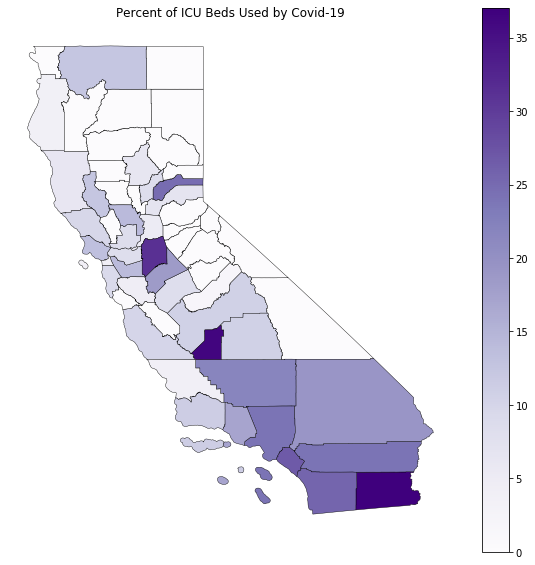

In [101]:
# Imperial counnty reduced on map because it is an outlier. However, axis is still correct. 
plt.close()
co= cali_icu.copy()
co["percent"]=co["percent"].replace(max(co["percent"]),37)
piv_cases=geo.GeoDataFrame(co)
ax=piv_cases.plot(column="percent",cmap='Purples',figsize=(10,10),legend=True,edgecolor="black",linewidth=0.4)
ax.set_title("Percent of ICU Beds Used by Covid-19")
ax.set_axis_off()

The data for ICU bed counts and COVID patients with ICU where obtained by the California Department of Public Health. To calculate the number of COVID-19 ICU patients, I decided to add the number of ICU COVID positive patients with ICU COVID Suspected Patients. Looking at the map, it is clear that Southern California ICUs are filling fast due to COVID 19. This is probably due to the higher number of COVID cases as a percent of population. Additionally, the county with the highest Percentage is Imperial (approx. 64%), which is nearly 1.8x higher the next largest county, Kings County (approx. 37%).  Following these counties is San Joaquin (approx. 31%), Orange (approx. 27%) and San Diego (approx. 26%). Los Angeles County is ranked 8th on the list with approx. 24%. Based on this data and previous findings, Imperial County and Kings County are the counties that could be most at risk. While they have been able to keep the death: cases ratio low, the low ICU availability and the high percentage of the population with the virus may be a strong indication that these counties might experience a higher death/cases ratio in the coming weeks. Therefore, more resources should be provided to these two counties to ensure that this does not happen. 

## Key Findings 

1.	From April 15 to mid-May (approx. May-15th), the rate of overall increase is smaller than from mid-May to June-9th.
2.	Even though Imperial county has a very high percentage of cases, LA county's top three presence when it comes to cases and deaths makes it the hardest hit county. 
3.	While Imperial and Kings counties have been able to keep the death: cases ratio low, the low ICU availability and the high percentage of the population with the virus may be a strong indication that these counties might experience a higher death/cases ratio in the coming weeks.
4.	There is a strong relationship between a counties COVID-19 cases as a percentage of population and the metrics: percentage of people with housing with 10 or more units and percentage of houses with more rooms than people. This may be due in part to California’s social distancing policies.  
